# Вежба за Глава 2 - Конволуциски невронски мрежи невронски мрежи (Креирање на модел за класификација на слики)

1.Да се вклучат библиотеките потребни за работа со CNN.

2.Да се исчита податочното множество CIFAR10

3.Да се испечатат големините на податоците (слики и ознаки) за тренирање и тестирање.

4.Да се прикажат 25 случајни слики од податочното множество

5.Да се креира модел со следните слоеви

Конволуциски со 32 филтри со големина 3х3 и relu активација

Здружување MaxPooling со големина 2х2

Конволуциски со 64 филтри со големина 3х3 и relu активација

Здружување MaxPooling со големина 2х2

Конволуциски со 64 филтри со големина 3х3 и relu активација

Израмнување

Скрен слој со 96 јазли и relu активација

Излезен слој со 10 јазли и softmax активација

6.Да се прикаже преглед на моделот

7.Да се истренира мрежата користејќи adam метод за оптимизација на накрсна категорична ентропија како функцијата на загуба. Тренирањето да се одвива во 10 епохи.

8.Да се прикажат графички функциите на загуба и прецизноста во текот на тренирањето.

In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers
import matplotlib.pyplot as plt 
from keras import Sequential
import numpy as np

Читање на податочното множество CIFAR10

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [13]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Печатење на бројот на уникатни ознаки со кои се класифицираат сликите од податочното множество и печатење на најмалата и најголемата вредност на првата слика. Овие вредности ќе се користат за да се нормализира сликата во опсегот [0,1]

In [15]:
values = np.unique(train_labels) # unikatni oznaki
print(values.shape)

(10,)


In [22]:
print("min=", min(train_images[0].flatten()), "max=", max(train_images[0].flatten()))

#This code prints the minimum and maximum pixel values of the first image in the train_images dataset after flattening it into a 1D array.

#The flatten() function is used to convert a multi-dimensional array into a one-dimensional array. This is often necessary in neural networks, especially when transitioning from convolutional layers to fully connected (dense) layers. Convolutional layers output multi-dimensional feature maps, and these need to be flattened into a single vector before being passed to the dense layers, which expect a one-dimensional input.

min= 0 max= 255


Печатење на големината на сликите и ознаките за тренирање и сликите и ознаките за тестирање

In [23]:
print("Слики за тренирање:",train_images.shape)
print("Ознаки за тренирање:",train_labels.shape)
print("Слики за тестирање:",test_images.shape)
print("Ознаки за тестирање:",test_labels.shape)

Слики за тренирање: (50000, 32, 32, 3)
Ознаки за тренирање: (50000, 1)
Слики за тестирање: (10000, 32, 32, 3)
Ознаки за тестирање: (10000, 1)


1.The shape is typically (num_samples, height, width, channels), where num_samples is the number of training images, height and width are the dimensions of each image, and channels is the number of color channels (e.g., 3 for RGB images)

2.The shape is typically (num_samples, 1), where num_samples is the number of training images.

Приказ на 25 случајни слики од податочното множество

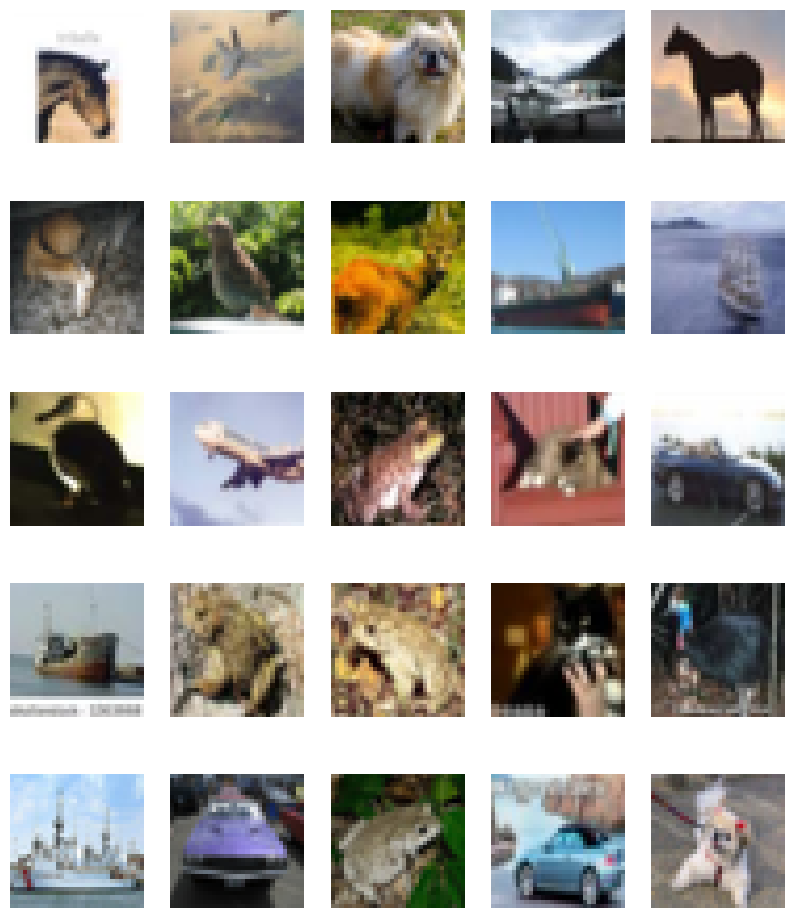

In [30]:
plt.figure(figsize=(10,12))
for i in range(25): #25 ciklusi za 25 subplots
    plt.subplot(5, 5, i + 1) #5 koloni, 5 redici
    plt.axis("off") 
    plt.grid(False) 
    plt.imshow(train_images[np.random.randint(test_images.shape[0])]) #Selects a random image from train_images and displays it in the current subplot.
plt.show()

# Градење на модел со додавање на слоеви

Најпрво се креира празен секвенцијален модел во кој ќе се додаваат слоеви. За да може да се повика методот summary(), потребно е првиот слој да го дефинира обликот на влезот кој потоа се користи за пресметка на бројот на параметри на секој нареден слој. Еден од начините да се постигне тоа е кај првиот слој како аргумент да се наведе input_shape, но бидејќи ќе се користат слоеви за нормализација и збогатување на податочното множество, како прв слој на празниот модел може да се доаде InputLayer во кој се наведува обликот на влезните слики. Бидејќи станува збор за слики во боја со големина 32х32, длабочината на влезот е 3, па затоа влезниот облике е (32,32,3).

Конволуциски со 32 филтри со големина 3х3 и relu активација

Здружување MaxPooling со големина 2х2

Конволуциски со 64 филтри со големина 3х3 и relu активација

Здружување MaxPooling со големина 2х2

Конволуциски со 64 филтри со големина 3х3 и relu активација

In [34]:
train_images.shape

(50000, 32, 32, 3)

In [35]:
model = Sequential([
    #input layer - oblikot na dadenite sliki
    layers.InputLayer(input_shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])),
    
    #Нормализирање на вредностите на влезните податоци од оспегот [0, 255] во опсегот [0,1]
    layers.Rescaling(1./255), #To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./ 255.
    
    # This layer is used to detect features such as edges, textures, and patterns in the input image.
    # filters: The number of output filters (feature maps) in the convolution. Each filter detects a different feature in the input image.
    # kernel_size: The size of the convolutional kernel (filter). In this case, (3,3) means a 3x3 filter.
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), #Конволуциски со 32 филтри со големина 3х3 и relu активација
    
    #Purpose: The MaxPooling2D layer performs down-sampling (sub-sampling) by taking the maximum value over a defined window. This reduces the spatial dimensions (height and width) of the input, which helps in reducing the computational cost and controlling overfitting
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    #izlezni (hidden) sloevi se dodavaat 
    layers.Flatten(), #od 2D vo 1D array za Dense sloj
    layers.Dense(96, activation='relu'),  
    layers.Dense(10, activation='softmax') #10 sliki deka se, multi-class classification
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)         

Се компајлира моделот така што ќе користи adam метод за оптимизација на накрсна категорична ентропија како функцијата на загуба. Како метрика за перформанските на моделот се користи прецизноста. Потоа се започнува со тренирање на мрежата во 10 епохи користејќи го податочното множество.

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


2025-02-09 00:57:09.990524: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 16s 9ms/step - loss: 1.4862 - accuracy: 0.4604 - val_loss: 1.1790 - val_accuracy: 0.5760
Epoch 2/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.0929 - accuracy: 0.6156 - val_loss: 1.0340 - val_accuracy: 0.6306
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9397 - accuracy: 0.6682 - val_loss: 0.9025 - val_accuracy: 0.6858
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8396 - accuracy: 0.7044 - val_loss: 0.9092 - val_accuracy: 0.6869
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7644 - accuracy: 0.7319 - val_loss: 0.8700 - val_accuracy: 0.6962
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7027 - accuracy: 0.7529 - val_loss: 0.8633 - val_accuracy: 0.7089
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6435 - accuracy: 0.7732 - val_loss: 0.8871 - val_accuracy:

Приказ на вредностие на прецизноста и загубата во текот на епохите добиени од тренинг множеството и од валидациското множество.

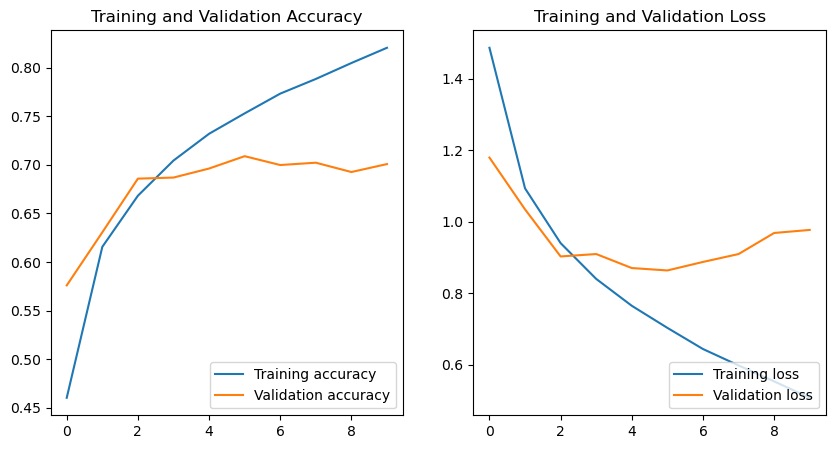

313/313 - 1s - loss: 0.9767 - accuracy: 0.7008 - 1s/epoch - 4ms/step


In [39]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Според добиените графици може да се заклучи дека моделот е пренагоден на податочното множество бидејќи прецизноста при тренирањето постојано се подобрува за разлика од валидациската прецизност која во даден момент се сече со кривата на прецизноста при тренирање и престанува да бележи тредн на подобрување.